# CS-6570 Assignment #5 - Unsupervised Learning and Hypothesis Testing

Rob Christiansen

*Weber State University*

In this assignment, we'll work through some examples of unsupervised learning and hypothesis testing based on what we covered in the lectures. Please note many of these sections will require some code plus some explanation. You should use markdown for the explanations, and be sure to include both!

But first, let's import our standard libraries:

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

**PCA and K-Means**

We'll import the PCA and K-means functions from sklearn.

In [ ]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

Next, we'll generate a simulated data set with 20 observations in each of three classes (so 60 observations total) with 50 variables.

In [ ]:
np.random.seed(42);
X = np.random.standard_normal((60,50));

delta1 = np.random.uniform(.5,1,50)
delta2 = np.random.uniform(-1,-.5,50)

X[:20,:] += delta1
X[20:40,:] += delta2

Perform PCA on the 60 observations and plot the first two principle component score vectors. Use a different color to indicate the observations in each of the three classes.

In [ ]:
# Since the deltalabels are not contained within the original set, I created a set to use for the coloring

deltalabels0 = np.empty(20)
deltalabels0.fill(0)

deltalabels1 = np.empty(20)
deltalabels1.fill(1)

deltalabels2 = np.empty(20)
deltalabels2.fill(2)

deltalabels = np.append(deltalabels0, deltalabels1)
deltalabels = np.append(deltalabels, deltalabels2)
deltalabels

In [ ]:
from sklearn.decomposition import PCA
# Generate all the principal components
pca = PCA() # Default n_components = min(n_samples, n_features)
#The fit_transform returns a numpy array of each data point expressed in terms of the principle components
X_train_pc = pca.fit_transform(X)
# View the principle components
# print(pca.components_)
# print(X_train_pc)

i = 0
for c in pca.explained_variance_ratio_[:10]:
    i = i+1
    print("For component " + str(i) + " the percentage of the variance explained is: {:.2%}".format(c))

fig, ax = plt.subplots(figsize=(8,8))
ax.scatter(X_train_pc[:,0], X_train_pc[:,1], c=deltalabels) # Need to figure out how to color the original classes
ax.set_title("Primary PCA Components w/o KMeans Clustering");

Perform $K$-means clustering of the observations with $K = 3$. How well do the clusters that you obtained in $K$-means clustering compare to the true class labels?

In [ ]:
X_train_pc = X

kmeans = KMeans(n_clusters=3,
                random_state=3,
                n_init=20).fit(X_train_pc)
fig, ax = plt.subplots(figsize=(8,8))
ax.scatter(X_train_pc[:,0], X_train_pc[:,1], c=kmeans.labels_)
ax.set_title("K-Means Clustering Results with K=3, No PCA");

Perform $K$-means clustering with $K$ = 2. Describe your results.

In [ ]:
X_train_pc = X

kmeans = KMeans(n_clusters=2,
                random_state=3,
                n_init=20).fit(X_train_pc)
fig, ax = plt.subplots(figsize=(8,8))
ax.scatter(X_train_pc[:,0], X_train_pc[:,1], c=kmeans.labels_)
ax.set_title("K-Means Clustering Results with K=2, No PCA");

Now perform $K$-means clustering with $K = 4$, and describe your results.

In [ ]:
X_train_pc = X

kmeans = KMeans(n_clusters=4,
                random_state=3,
                n_init=20).fit(X_train_pc)
fig, ax = plt.subplots(figsize=(8,8))
ax.scatter(X_train_pc[:,0], X_train_pc[:,1], c=kmeans.labels_)
ax.set_title("K-Means Clustering Results with K=4, No PCA");

Now perform $K$-means clustering with $K = 3$ on the first two principle component score vectors, rather than the raw data. That is, perform $K$-means clustering on the $60 \times 2$ matrix of which the first columns is the first principal component score vector, and the second column is the second principal component score vector. Comment on the results.

In [ ]:
pca = PCA() # Default n_components = min(n_samples, n_features)
#The fit_transform returns a numpy array of each data point expressed in terms of the principle components
X_train_pc = pca.fit_transform(X)

kmeans = KMeans(n_clusters=3,
                random_state=3,
                n_init=20).fit(X_train_pc)
fig, ax = plt.subplots(figsize=(8,8))
ax.scatter(X_train_pc[:,0], X_train_pc[:,1], c=kmeans.labels_)
ax.set_title("K-Means Clustering Results with PCA and K=3");

Using the [StandardScalar](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html) estimator, perform $K$-means clustering with $K = 3$ on the data *after scaling each variable to have standard deviation one*. How do these results compare to those obtained in (b)? Explain.

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler(with_std = True, with_mean = True)

In [ ]:
X_scaled = scaler.fit_transform(X)
print(scaler.mean_)

pca = PCA() # Default n_components = min(n_samples, n_features)
#The fit_transform returns a numpy array of each data point expressed in terms of the principle components
X_train_pc = pca.fit_transform(X_scaled)

kmeans = KMeans(n_clusters=3,
                random_state=3,
                n_init=20).fit(X_train_pc)
fig, ax = plt.subplots(figsize=(8,8))
ax.scatter(X_train_pc[:,0], X_train_pc[:,1], c=kmeans.labels_)
ax.set_title("K-Means Clustering Results with Scaled Data, PCA, and K=3");

**Hierarchical Clustering**

Using the [USArrests](https://r-data.pmagunia.com/dataset/r-dataset-package-datasets-usarrests) dataset, perform hierarchical clustering on the states. You can find this dataset on Canvas. Also, you'll want to import the pacakages below and use the compute_linkage function defined below (from the lecture notes).

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram

def compute_linkage(hclust):
    """

    Create linkage matrix used to plot a dendrogram

    Follows [sklearn example](https://scikit-learn.org/stable/auto_examples/cluster/plot_agglomerative_dendrogram.html)

    Parameters
    ----------

    hclust : `sklearn.cluster.AgglomerativeClustering`
        Fitted hierarchical clustering object.

    Returns
    -------

    linkage_matrix : np.ndarray
        Array to be passed to `dendrogram` from `scipy.cluster.hierarchy`.

    """
    
    counts = np.zeros(hclust.children_.shape[0])
    n_samples = len(hclust.labels_)
    for i, merge in enumerate(hclust.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([hclust.children_, hclust.distances_,
                                      counts]).astype(float)
    return linkage_matrix

First, use hierarchical clustering with complete linkage and Euclidean distance to cluster the states.

In [8]:
X = pd.read_csv('Datasets/USArrests.csv')
X = X.set_index('State')

Cut the dendogram at a height that results in three distinct clusters. Which states belong to which clusters?

In [9]:
from sklearn.cluster import AgglomerativeClustering

HClust = AgglomerativeClustering
hc_comp = HClust(distance_threshold=0,
                 n_clusters=None,
                 linkage='complete',
                 metric='euclidean')
hc_comp.fit(X);

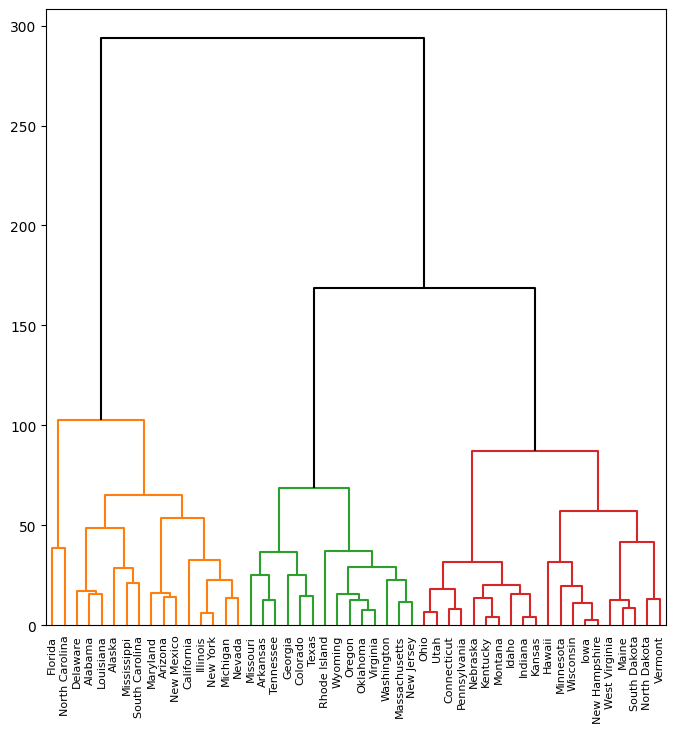

In [11]:
#Your Code Here
from scipy.cluster.hierarchy import dendrogram
linkage_comp = compute_linkage(hc_comp)

fig, ax = plt.subplots(1, 1, figsize=(8, 8))
dendrogram(linkage_comp,
           ax=ax,
           color_threshold=150,
           above_threshold_color='black',
           leaf_rotation=90, 
           leaf_font_size=8, 
           labels=X.index
           );


Hierarchically cluster the states using complete linkage and Euclidean distance, *after scaling the variables to have standard deviation one*.

In [17]:
X = pd.read_csv('Datasets/USArrests.csv')
X = X.set_index('State')
X

,Murder,Assault,UrbanPop,Rape
State,,,,
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6
Colorado,7.9,204,78,38.7
Connecticut,3.3,110,77,11.1
Delaware,5.9,238,72,15.8
Florida,15.4,335,80,31.9


In [13]:
from sklearn.preprocessing import StandardScaler

# Scaling the data so that all the features become comparable
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [14]:
from sklearn.cluster import AgglomerativeClustering

HClust = AgglomerativeClustering
hc_comp = HClust(distance_threshold=0,
                 n_clusters=None,
                 linkage='complete',
                 metric='euclidean')
hc_comp.fit(X_scaled);

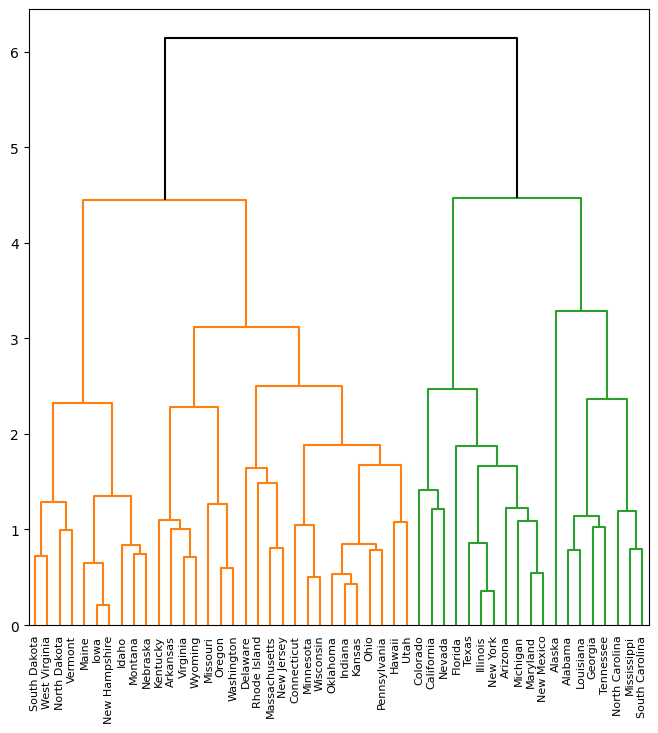

In [19]:
#Your Code Here
from scipy.cluster.hierarchy import dendrogram
linkage_comp = compute_linkage(hc_comp)

fig, ax = plt.subplots(1, 1, figsize=(8, 8))
dendrogram(linkage_comp,
           ax=ax,
           color_threshold=5,
           above_threshold_color='black',
           leaf_rotation=90, 
           leaf_font_size=8, 
           labels=X.index
           );


What effect does scaling the variables have on the hierarchical clustering obtained? In your opinion, should the variables be scaled before the inter-observation dissimilarities are computed? Provide a justification for your answer.

**Looking at the source data it's clear that the Assault feature is at around 10x the other features (Murder, Urban Pop, and Rape). As a result, if we *don't* scale the data, the Assault data will overwhelm the dissimiliarity measures used for clustring. Viewing X_scaled shows all the features are now much more equally balanced. Additionally, the cut threshold must be changed and it's almost impossible to get to three clusters whereas with non-scaled data it was easy.**

In [18]:
X_scaled

array([[ 1.25517927,  0.79078716, -0.52619514, -0.00345116],
       [ 0.51301858,  1.11805959, -1.22406668,  2.50942392],
       [ 0.07236067,  1.49381682,  1.00912225,  1.05346626],
       [ 0.23470832,  0.23321191, -1.08449238, -0.18679398],
       [ 0.28109336,  1.2756352 ,  1.77678094,  2.08881393],
       [ 0.02597562,  0.40290872,  0.86954794,  1.88390137],
       [-1.04088037, -0.73648418,  0.79976079, -1.09272319],
       [-0.43787481,  0.81502956,  0.45082502, -0.58583422],
       [ 1.76541475,  1.99078607,  1.00912225,  1.1505301 ],
       [ 2.22926518,  0.48775713, -0.38662083,  0.49265293],
       [-0.57702994, -1.51224105,  1.21848371, -0.11129987],
       [-1.20322802, -0.61527217, -0.80534376, -0.75839217],
       [ 0.60578867,  0.94836277,  1.21848371,  0.29852525],
       [-0.13637203, -0.70012057, -0.03768506, -0.0250209 ],
       [-1.29599811, -1.39102904, -0.5959823 , -1.07115345],
       [-0.41468229, -0.67587817,  0.03210209, -0.34856705],
       [ 0.44344101, -0.

**Hypothesis Testing**

In [ ]:
X=np.random.standard_normal((20,100))

For this part of the assignment, we've simulated (above) for $m = 100$ fund managers. These data represent each fund manager's percentage returns for each of $n = 20$ months. We wish to test the null hypothesis that each fund manager's percentage returns have population mean equal to zero. Notice that we simulated the data in such a way that each fund manager's percentage returns do have population mean zero; in other words, *all* $m$ null hypotheses are true.

Conduct a one-sample $t$-test for each fund manager, and plot a histogram of the $p$-values obtained.

In [ ]:
from scipy.stats import ttest_1samp

In [ ]:
#Your Code Here

If we control Type I error for each null hypothesis at level $\alpha = .05$, then how many null hypotheses do we reject?

In [ ]:
from statsmodels.stats.multitest import multipletests as mult_test

In [ ]:
#Your Code Here

If we control the FWER at level $.05$, then how many null hypotheses do we reject?

In [ ]:
#Your Code Here

If we control the FDR at level $.05$, then how many null hypotheses do we reject

In [ ]:
#Your Code Here

Now suppose we "cherry-pick" the 10 fund managers who perform the  best in our data. If we control the FWER for just these 10 fund managers at level $.05$, then how many null hypotheses do we reject? If we control the FDR for just these 10 fund managers at level $0.05$, then how many null hypotheses do we reject?

In [ ]:
#Your Code Here

Explain why the analysis directly above (where we "cherry-picked" the data) is misleading.